# Regression on BudgetUK Dataset 

**Dataset - Budget UK**

**Importing Libraries:**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.mlab as mlab

**Loading Data:**

In [2]:
cd Desktop

/Users/yashasvijariwala/Desktop


In [3]:
load_data=pd.read_csv("BudgetUK.csv")
load_data.head()

,Unnamed: 0,wfood,wfuel,wcloth,walc,wtrans,wother,totexp,income,age,children,Age_Binary,savings,planner
0,0,0.4272,0.1342,0.0000,0.0106,0.1458,0.2822,50,130,25,2,0,0.384615,0
1,1,0.3739,0.1686,0.0091,0.0825,0.1215,0.2444,90,150,39,2,1,0.600000,1
2,2,0.1941,0.4056,0.0012,0.0513,0.2063,0.1415,180,230,47,2,1,0.782609,1
3,3,0.4438,0.1258,0.0539,0.0397,0.0652,0.2716,80,100,33,2,0,0.800000,1
4,4,0.3331,0.0824,0.0399,0.1571,0.2403,0.1473,90,100,31,1,0,0.900000,1


**Total Number of Rows and Columns:**

In [4]:
load_data.shape

(1519, 14)

# Clean Data:

In [5]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 14 columns):
Unnamed: 0    1519 non-null int64
wfood         1519 non-null float64
wfuel         1519 non-null float64
wcloth        1519 non-null float64
walc          1519 non-null float64
wtrans        1519 non-null float64
wother        1519 non-null float64
totexp        1519 non-null int64
income        1519 non-null int64
age           1519 non-null int64
children      1519 non-null int64
Age_Binary    1519 non-null int64
savings       1519 non-null float64
planner       1519 non-null int64
dtypes: float64(7), int64(7)
memory usage: 166.2 KB


In [6]:
load_data.isnull().sum()

Unnamed: 0    0
wfood         0
wfuel         0
wcloth        0
walc          0
wtrans        0
wother        0
totexp        0
income        0
age           0
children      0
Age_Binary    0
savings       0
planner       0
dtype: int64

**Pair Plot:**

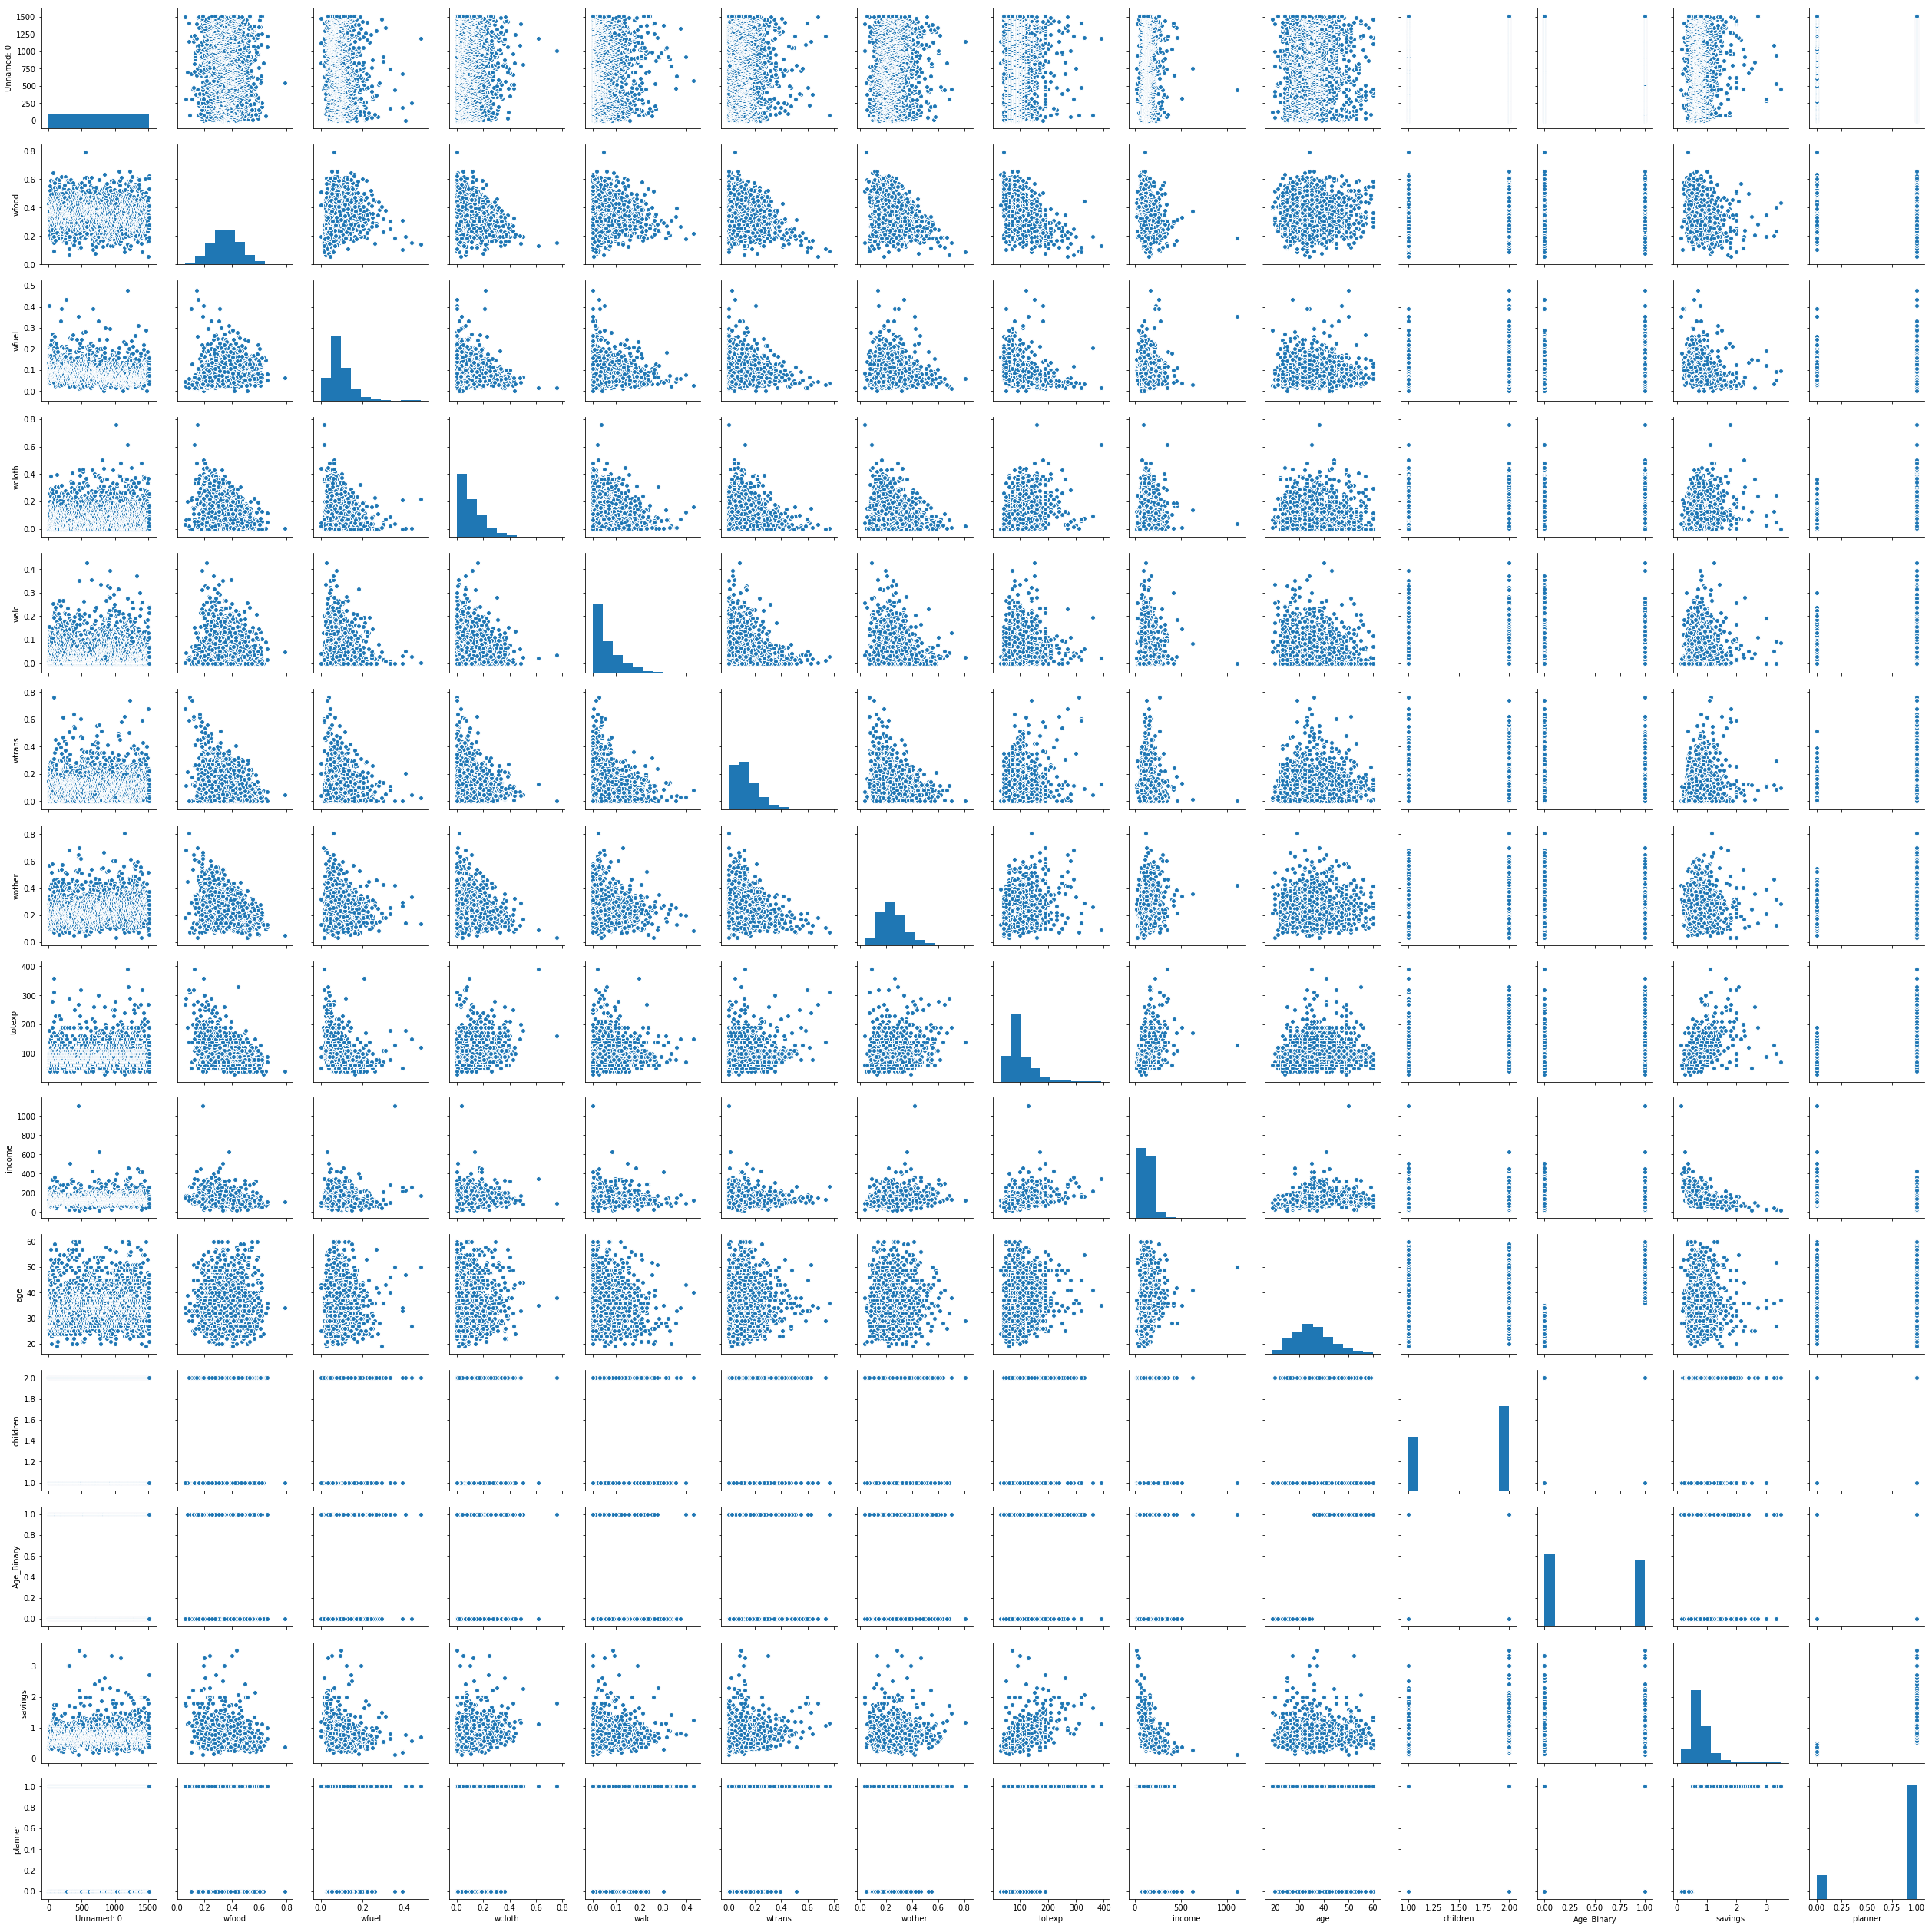

In [7]:
sns.pairplot(load_data)
plt.show()

**Heat Map**

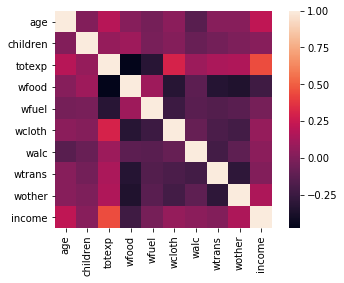

In [8]:
data = load_data[["age","children","totexp","wfood","wfuel","wcloth","walc","wtrans","wother", "income"]] #Subsetting the data
cor = data.corr() 
sns.heatmap(cor, square = True)

In [18]:
# Age greater than 35 gets '1' as value and lower than that gets '0' as value
def planning(x):
    if x>0.5:
        return 1
    else:
        return 0

In [19]:
load_data['savings'] = load_data['totexp']/load_data['income']

In [20]:
load_data['planner'] = load_data['savings'].apply(planning)

In [26]:
load_data.head()

,wfood,wfuel,wcloth,walc,wtrans,wother,totexp,income,age,children,Age_Binary,savings,planner
0,0.4272,0.1342,0.0000,0.0106,0.1458,0.2822,50,130,25,2,0,0.384615,0
1,0.3739,0.1686,0.0091,0.0825,0.1215,0.2444,90,150,39,2,1,0.600000,1
2,0.1941,0.4056,0.0012,0.0513,0.2063,0.1415,180,230,47,2,1,0.782609,1
3,0.4438,0.1258,0.0539,0.0397,0.0652,0.2716,80,100,33,2,0,0.800000,1
4,0.3331,0.0824,0.0399,0.1571,0.2403,0.1473,90,100,31,1,0,0.900000,1


In [1]:
#load_data=load_data.drop('Unnamed: 0',axis=1)

# Clustering:

**Finding the Cluster value using elbow method:**

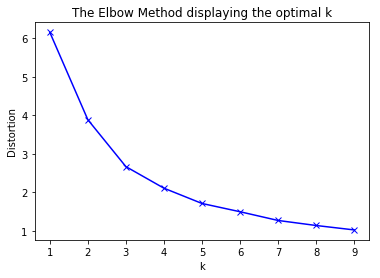

In [37]:
# determine k using elbow method
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

x1 = np.array(load_data['planner'])
x2 = np.array(load_data['age'])

#creating cross product of the two columns and reshaping the data
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# determining k for kmeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#Plotting the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method displaying the optimal k')
plt.show()

**Clustering using KMeans:**

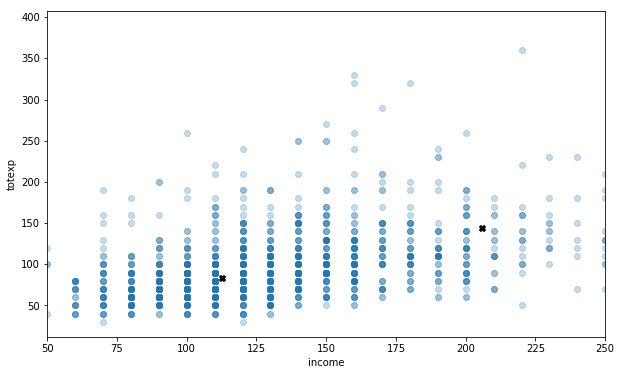

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=2)
# X = load_data[load_data.children==2][["wfood","wfuel"]]
X = load_data[["income","totexp"]]
kmeans.fit(X)

fig = plt.figure(figsize=(10, 6))
plt.scatter(load_data['income'], load_data['totexp'], data=load_data, alpha=0.25)
# plt.scatter(x="wfood",y="wfuel", data=load_data,alpha=0.25)
plt.xlim([50,250])
plt.xlabel("income")
plt.ylabel("totexp")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X")
plt.show()

In [39]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
            colored_labels.append(colors[7])
        else:
            colored_labels.append(colors[label])
    return colored_labels

**Clustering Using DBSCAN:**

Counter({0: 1519})


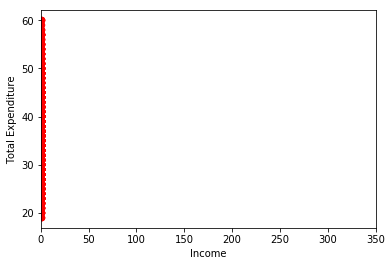

In [40]:
# Fit a DBSCAN estimator
from sklearn.cluster import DBSCAN
from collections import Counter

estimator = DBSCAN(eps=25.0, min_samples=10)
X = load_data[["planner","age"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
# print labels
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(load_data['planner'], load_data['age'], data=load_data, c=colors)
plt.xlabel("Income")
plt.xlim([0,350])
plt.ylabel("Total Expenditure")
plt.show()

**Clustering using Agglomerative:**

Counter({1: 824, 0: 695})


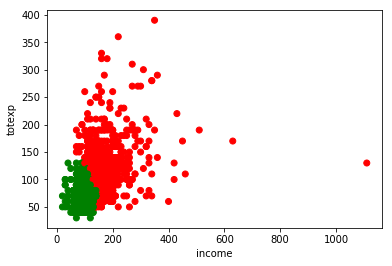

In [41]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=2)
X = load_data[["income","totexp"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(load_data['income'], load_data['totexp'], data=load_data, c=colors)
plt.xlabel("income")
plt.ylabel("totexp")
plt.show()

**Do the clustering methods generate the same clusters?**

Both of the methods give different clusters

**Does scaling effect the clustering?  **

Yes, it changes the cluster divisions

**Does the clustering produce interesting groupings?**

Yes, for the DBSCAN estimator it clusters the group of poeple with higher income than 300 in other group. And, for Agglomerative Clustering this says there is a similar behaviour in poeple with income less than 180.

# Linear Model:

In [42]:
import statsmodels.api as sm

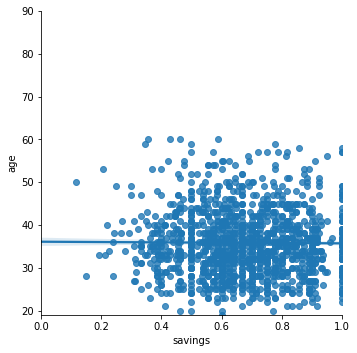

In [49]:
sns.lmplot('savings','age',data=load_data)
plt.ylim([19,90])
plt.xlim([0,1])
plt.show()

**Without constant using Statsmodel:**

In [50]:
import statsmodels.api as sm

X = load_data[["age"]]
y = load_data["income"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     7385.
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        19:13:09   Log-Likelihood:                -8415.8
No. Observations:                1519   AIC:                         1.683e+04
Df Residuals:                    1518   BIC:                         1.684e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            3.7138      0.043     85.937      0.000       3.629       3.799
==============================================================================
Omnibus:                     1277.687   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93780.915
Skew:                           3.445   Prob(JB):                         0.00
Kurtosis:                      40.872   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**With constant using Statsmodel(Single Variable):**

In [51]:
import statsmodels.api as sm # import statsmodels 

X = load_data["age"] ## X usually means our input variables (or independent variables)
y = load_data["income"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     76.05
Date:                Tue, 17 Jul 2018   Prob (F-statistic):           7.12e-18
Time:                        19:13:10   Log-Likelihood:                -8363.7
No. Observations:                1519   AIC:                         1.673e+04
Df Residuals:                    1517   BIC:                         1.674e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.8361      7.206     10.385      0.000      60.701      88.971
age            1.7164      0.197      8.721      0.000       1.330       2.102
==============================================================================
Omnibus:                     1476.845   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152521.080
Skew:                           4.270   Prob(JB):                         0.00
Kurtosis:                      51.341   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**With constant using Statsmodel(Multi Variable):**

In [52]:
X = load_data[["age","children","totexp","wfood","wfuel","wcloth","walc","wtrans","wother"]] ## X usually means our input variables (or independent variables)
y = load_data["income"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     54.47
Date:                Tue, 17 Jul 2018   Prob (F-statistic):           5.03e-86
Time:                        19:13:11   Log-Likelihood:                -8187.2
No. Observations:                1519   AIC:                         1.639e+04
Df Residuals:                    1509   BIC:                         1.645e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.489e+04   1.98e+04     -0.751      0.453   -5.38e+04     2.4e+04
age            1.1232      0.183      6.141      0.000       0.764       1.482
children       0.0715      2.853      0.025      0.980      -5.524       5.667
totexp         0.6342      0.040     16.026      0.000       0.557       0.712
wfood       1.489e+04   1.98e+04      0.751      0.453    -2.4e+04    5.38e+04
wfuel       1.505e+04   1.98e+04      0.760      0.448   -2.38e+04    5.39e+04
wcloth      1.489e+04   1.98e+04      0.751      0.453    -2.4e+04    5.38e+04
walc        1.494e+04   1.98e+04      0.754      0.451   -2.39e+04    5.38e+04
wtrans      1.489e+04   1.98e+04      0.751      0.453    -2.4e+04    5.38e+04
wother      1.495e+04   1.98e+04      0.754      0.451   -2.39e+04    5.38e+04
==============================================================================
Omnibus:                     1538.735   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216863.094
Skew:                           4.467   Prob(JB):                         0.00
Kurtosis:                      60.850   Cond. No.                     4.34e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Linear Regression Using sklearn

In [53]:
from sklearn import linear_model

In [54]:
from sklearn import datasets ## imports datasets from scikit-learn
X = load_data[['age']]
y = load_data[["income"]]

In [55]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [56]:
predictions = lm.predict(X)
print(predictions[0:5])

[[117.74658252]
 [141.77645952]
 [155.5078178 ]
 [131.47794081]
 [128.04510124]]


In [57]:
lm.score(X,y)

0.04773964753808968

# Multiple Linear Regression Using sklearn

In [58]:
from sklearn import datasets ## imports datasets from scikit-learn
X_multi= load_data[["age","children","wfood","wfuel","wcloth","walc","wtrans","wother"]]
y = load_data[["planner"]]

In [59]:
lm = linear_model.LinearRegression()
model = lm.fit(X_multi,y)

In [60]:
predictions = lm.predict(X_multi)
print(predictions[0:5])

[[0.74690644]
 [0.74520678]
 [0.59305307]
 [0.75688248]
 [0.83416941]]


In [61]:
lm.score(X_multi,y)

0.0633508832982419

In [62]:
print('The estimated intercept coefficient is %.2f' %lm.intercept_)

The estimated intercept coefficient is 71.89


The equation now is changed as,

                   y(w,x) = w0 + w1x1 + ... + wpxp

                   where w is the coefficient and w0 is the intercept

**Is the relationship significant?**

The R squared is 0.829 which means that the linear regression model is a very good fit.

The 'age' has a statistically significant p-value (as it is 0.00)

**Are any model assumptions violated?   **

No


**Is there any multi-colinearity in the model?   **

Yes, as the age increases there is an increase in wfood and income

**In the multiple regression models are predictor variables independent of all the other predictor variables?   **

Yes

**In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.   **

Age and toexp are good predictors

**Does the model make sense?  **

Yes, age is a good predictor

**Cross-validate the model. How well did it do?      **

It did average

# Model Rank and Predictor Variables:

In [64]:
from pandas import Series, DataFrame
coeff_df = DataFrame(X_multi.columns)
coeff_df.columns = ['Features']
lm_coef_list = lm.coef_.ravel() # converting 2D array to 1D array
coeff_df['Coefficient Estimates'] = Series(lm_coef_list)
coeff_df

,Features,Coefficient Estimates
0,age,-0.001099
1,children,0.062544
2,wfood,-71.344872
3,wfuel,-71.873076
4,wcloth,-70.612641
5,walc,-70.641030
6,wtrans,-70.823209
7,wother,-71.007950


In [65]:
coeff_df['coef_ranked'] = coeff_df['Coefficient Estimates'].rank(ascending=0)
coeff_df

,Features,Coefficient Estimates,coef_ranked
0,age,-0.001099,2.0
1,children,0.062544,1.0
2,wfood,-71.344872,7.0
3,wfuel,-71.873076,8.0
4,wcloth,-70.612641,3.0
5,walc,-70.641030,4.0
6,wtrans,-70.823209,5.0
7,wother,-71.007950,6.0


## Note:
We initially approached the problem with age as the best correlated variable for the target arrival. But this table let us know that the wfuel is the best coefficient estimate when compared to that of others.

In [31]:
#removing unsignificant predictors

X_multi = X_multi[['wfuel','wother','walc']]

## Using Training and Validation

In [32]:
import sklearn
from sklearn.linear_model import LinearRegression

In [33]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,load_data['income'])

In [34]:
# size of the training
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1139, 1) (380, 1) (1139,) (380,)


In [35]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
#prediction
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [37]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : %.2f"
     % np.mean((Y_train-pred_train)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : 3638.28


In [38]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: %.2f"
     % np.mean((Y_test-pred_test)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: 3282.46


## Residual Plot
In regression analysis, the difference between the observed value of the dependent variable(y) and the predicted value(y^) is called as the residual(e).

                      Residual = Observed value - Predicted value

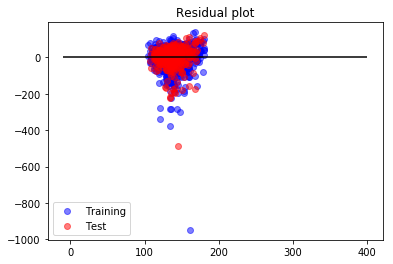

In [39]:
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

plt.hlines(y=0, xmin=-10,xmax=400)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual plot')
plt.show()

In [40]:
#Compare our testing RMSE with null RMSE

y_null = np.zeros_like(Y_test, dtype=float)
y_null.fill(Y_test.mean())
y_null[0:33]

array([138.18421053, 138.18421053, 138.18421053, 138.18421053,
       138.18421053, 138.18421053, 138.18421053, 138.18421053,
       138.18421053, 138.18421053, 138.18421053, 138.18421053,
       138.18421053, 138.18421053, 138.18421053, 138.18421053,
       138.18421053, 138.18421053, 138.18421053, 138.18421053,
       138.18421053, 138.18421053, 138.18421053, 138.18421053,
       138.18421053, 138.18421053, 138.18421053, 138.18421053,
       138.18421053, 138.18421053, 138.18421053, 138.18421053,
       138.18421053])

In [41]:
from sklearn import metrics
y_null_rmse =np.sqrt(metrics.mean_squared_error(Y_test, y_null))
y_null_rmse

57.98927090562706

The Null RMSE value is **58.03** 

## Regularization

In [43]:
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
#from sklearn.cross_validation import KFold, cross_val_score, train_test_split

## Ridge Regression

In [44]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

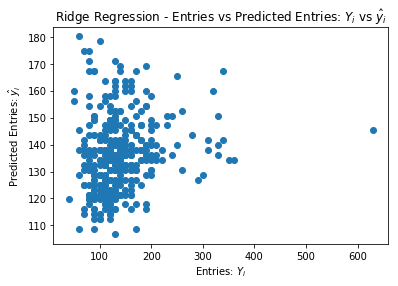

In [45]:
y_pred = ridge.predict(X_test)

plt.scatter(Y_test, y_pred)
plt.xlabel("Entries: $Y_i$")
plt.ylabel("Predicted Entries: $\hat{y}_i$")
plt.title("Ridge Regression - Entries vs Predicted Entries: $Y_i$ vs $\hat{y}_i$")
plt.show()

In [46]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
rmse

57.29279388981368

The Ridge regression RMSE value is **51.04**

## Lasso Regression

In [47]:
lasso = Lasso(fit_intercept=True, alpha=0.5)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

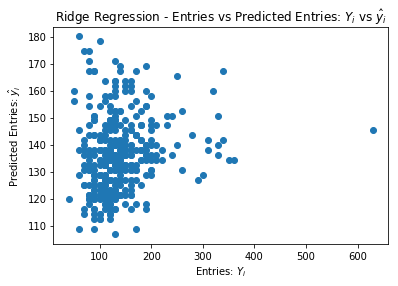

In [48]:
y_pred = lasso.predict(X_test)

plt.scatter(Y_test, y_pred)
plt.xlabel("Entries: $Y_i$")
plt.ylabel("Predicted Entries: $\hat{y}_i$")
plt.title("Ridge Regression - Entries vs Predicted Entries: $Y_i$ vs $\hat{y}_i$")
plt.show()

In [49]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
rmse

57.28874887282535

The lasso regression RMSE value is **51.23**

In [50]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X_multi,load_data['income'])
# size of the training
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1139, 3) (380, 3) (1139,) (380,)


In [51]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
#prediction
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [53]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : %.2f"
     % np.mean((Y_train-pred_train)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : 3762.22


In [54]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: %.2f"
     % np.mean((Y_test-pred_test)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: 3242.93


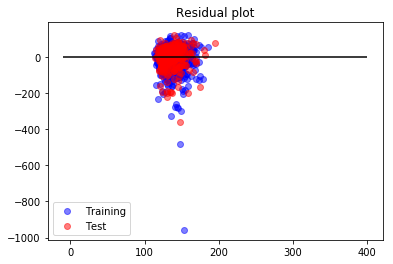

In [55]:
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

plt.hlines(y=0, xmin=-10,xmax=400)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual plot')
plt.show()

## Logistic Regression

In [56]:
#Data imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Math
import math

#Plot
#plot import
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

#Machine learning
import sklearn
from sklearn.linear_model import LogisticRegression

#Evaluating ML results
from sklearn import metrics

In [57]:
# Age
def Age_Diff(x):
    if x<50:
        return 1
    else:
        return 0

In [58]:
load_data['Age_Diff'] = load_data['age'].apply(Age_Diff)

In [59]:
load_data.head()

,Unnamed: 0,wfood,wfuel,wcloth,walc,wtrans,wother,totexp,income,age,children,Age_Diff
0,1,0.4272,0.1342,0.0000,0.0106,0.1458,0.2822,50,130,25,2,1
1,2,0.3739,0.1686,0.0091,0.0825,0.1215,0.2444,90,150,39,2,1
2,3,0.1941,0.4056,0.0012,0.0513,0.2063,0.1415,180,230,47,2,1
3,4,0.4438,0.1258,0.0539,0.0397,0.0652,0.2716,80,100,33,2,1
4,5,0.3331,0.0824,0.0399,0.1571,0.2403,0.1473,90,100,31,1,1


In [60]:
# create a data frame for categorical variables
age_dummies = pd.get_dummies(load_data['age'],prefix='age')

In [61]:
age_dummies.head()

,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,...,age_51,age_52,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# drop the categorical variables
X = load_data.drop(['age'],axis=1)
X = load_data[['wfood','wfuel','wcloth','walc','wtrans','wother','totexp','income','children']]

In [63]:
X = pd.concat([X,age_dummies],axis=1)

In [64]:
X.head()

,wfood,wfuel,wcloth,walc,wtrans,wother,totexp,income,children,age_19,...,age_51,age_52,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60
0,0.4272,0.1342,0.0000,0.0106,0.1458,0.2822,50,130,2,0,...,0,0,0,0,0,0,0,0,0,0
1,0.3739,0.1686,0.0091,0.0825,0.1215,0.2444,90,150,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0.1941,0.4056,0.0012,0.0513,0.2063,0.1415,180,230,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0.4438,0.1258,0.0539,0.0397,0.0652,0.2716,80,100,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0.3331,0.0824,0.0399,0.1571,0.2403,0.1473,90,100,1,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
Y = load_data.income
Y.head()

0    130
1    150
2    230
3    100
4    100
Name: income, dtype: int64

In [66]:
#Dropping clear column
X = X.drop('age_52',axis=1)

In [67]:
#Drop rain since it is target
X= X.drop('income',axis=1)

In [68]:
X.head()

,wfood,wfuel,wcloth,walc,wtrans,wother,totexp,children,age_19,age_20,...,age_50,age_51,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60
0,0.4272,0.1342,0.0000,0.0106,0.1458,0.2822,50,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.3739,0.1686,0.0091,0.0825,0.1215,0.2444,90,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.1941,0.4056,0.0012,0.0513,0.2063,0.1415,180,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.4438,0.1258,0.0539,0.0397,0.0652,0.2716,80,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.3331,0.0824,0.0399,0.1571,0.2403,0.1473,90,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
Y.head()

0    130
1    150
2    230
3    100
4    100
Name: income, dtype: int64

In [70]:
Y = np.ravel(Y)
Y

array([130, 150, 230, ..., 260, 160, 140])

In [71]:
logmodel = LogisticRegression()

logmodel.fit(X,Y)

logmodel.score(X,Y)

0.19749835418038184

In [72]:
Y.mean()

136.24753127057275

In [73]:
df1 = load_data.copy()
age_dummy = pd.get_dummies(df1['age'],prefix='age')
age_dummy.head()
age_dummy.drop(['age_52'],axis=1,inplace=True)

In [80]:
keep = ['wfood', 'wfuel', 'wcloth']
age_dummy = df1[keep].join(age_dummy.ix[:, 'age_23':])
age_dummy.head()

,wfood,wfuel,wcloth,age_23,age_24,age_25,age_26,age_27,age_28,age_29,...,age_51,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60,intercept
0,0.4272,0.1342,0.0000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0.3739,0.1686,0.0091,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0.1941,0.4056,0.0012,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0.4438,0.1258,0.0539,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0.3331,0.0824,0.0399,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [81]:
# Adding intercept manually
age_dummy['intercept'] = 1.0
age_dummy.head()

,wfood,wfuel,wcloth,age_23,age_24,age_25,age_26,age_27,age_28,age_29,...,age_51,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60,intercept
0,0.4272,0.1342,0.0000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0.3739,0.1686,0.0091,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0.1941,0.4056,0.0012,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0.4438,0.1258,0.0539,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0.3331,0.0824,0.0399,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [82]:
predict = age_dummy.columns[1:]
predict

Index(['wfuel', 'wcloth', 'age_23', 'age_24', 'age_25', 'age_26', 'age_27',
       'age_28', 'age_29', 'age_30', 'age_31', 'age_32', 'age_33', 'age_34',
       'age_35', 'age_36', 'age_37', 'age_38', 'age_39', 'age_40', 'age_41',
       'age_42', 'age_43', 'age_44', 'age_45', 'age_46', 'age_47', 'age_48',
       'age_49', 'age_50', 'age_51', 'age_53', 'age_54', 'age_55', 'age_56',
       'age_57', 'age_58', 'age_59', 'age_60', 'intercept'],
      dtype='object')

In [88]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [89]:
age_model = sm.Logit(age_dummy['wfood'], age_dummy[predict]).fit()
age_model.summary()

Optimization terminated successfully.
         Current function value: 0.608394
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  wfood   No. Observations:                 1519
Model:                          Logit   Df Residuals:                     1479
Method:                           MLE   Df Model:                           39
Date:                Sat, 30 Jun 2018   Pseudo R-squ.:                0.008888
Time:                        19:44:29   Log-Likelihood:                -924.15
converged:                       True   LL-Null:                       -932.44
                                        LLR p-value:                    0.9994
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
wfuel          0.1451      1.074      0.135      0.893      -1.960       2.250
wcloth        -1.6208      0.614     -2.638      0.008      -2.825      -0.416
age_23        -0.0537      0.597     -0.090      0.928      -1.224       1.116
age_24        -0.0777      0.508     -0.153      0.879      -1.074       0.919
age_25         0.0100      0.473      0.021      0.983      -0.917       0.937
age_26        -0.0175      0.484     -0.036      0.971      -0.967       0.932
age_27        -0.0314      0.458     -0.069      0.945      -0.929       0.866
age_28         0.0045      0.444      0.010      0.992      -0.867       0.876
age_29        -0.0121      0.447     -0.027      0.978      -0.888       0.864
age_30        -0.0524      0.447     -0.117      0.907      -0.929       0.824
age_31        -0.0445      0.450     -0.099      0.921      -0.926       0.837
age_32        -0.0711      0.422     -0.169      0.866      -0.898       0.755
age_33        -0.0801      0.428     -0.187      0.851      -0.918       0.758
age_34        -0.0883      0.424     -0.208      0.835      -0.920       0.743
age_35        -0.0717      0.428     -0.168      0.867      -0.910       0.767
age_36        -0.0501      0.421     -0.119      0.905      -0.876       0.775
age_37        -0.0510      0.423     -0.121      0.904      -0.881       0.779
age_38        -0.0301      0.435     -0.069      0.945      -0.883       0.822
age_39         0.0661      0.458      0.144      0.885      -0.832       0.964
age_40         0.0174      0.449      0.039      0.969      -0.863       0.898
age_41        -0.1588      0.478     -0.332      0.740      -1.096       0.779
age_42         0.0440      0.480      0.092      0.927      -0.897       0.985
age_43        -0.0976      0.487     -0.201      0.841      -1.051       0.856
age_44         0.1669      0.520      0.321      0.748      -0.852       1.185
age_45        -0.1092      0.496     -0.220      0.826      -1.082       0.863
age_46         0.0002      0.587      0.000      1.000      -1.150       1.151
age_47         0.0566      0.566      0.100      0.920      -1.052       1.165
age_48        -0.0112      0.597     -0.019      0.985      -1.181       1.159
age_49        -0.1217      0.570     -0.214      0.831      -1.239       0.996
age_50        -0.0101      0.656     -0.015      0.988      -1.296       1.275
age_51        -0.2195      0.745     -0.295      0.768      -1.680       1.241
age_53         0.0681      0.715      0.095      0.924      -1.333       1.469
age_54         0.2381      0.767      0.311      0.756      -1.265       1.741
age_55         0.0399      0.777      0.051      0.959      -1.484       1.563
age_56        -0.3051      1.338     -0.228      0.820      -2.927       2.317
age_57         0.2645      0.771      0.343      0.732      -1.246       1.775
age_58         0.5692      1.462      0.389      0.697      -2.297       3.435
age_59         0.3142      1.211      0.259      0.795      -2.060       2.688
ag

wcloth is statistically significant with **p-value = 0** 

**Is the relationship significant?  **

wcloth is statistically significant with p-value = 0

**Does regularization help with creating models that validate better on out of sample data? **

Yes, Regularization improves creating models. This was verified using both ridge and lasso regression. The RMSE values were significantly reduced using regularization.

# References

https://github.com/statsmodels/statsmodels/issues/3931

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9